In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing


#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor



#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Read Data from CSV

In [7]:
data = pd.read_csv('UNdata_Export_Deaths by area.csv')

In [8]:
data.head()

,Country,Year,Rural,Total,Urban
0,Åland Islands,1953,0.0,260.0,0.0
1,Åland Islands,1954,0.0,244.0,0.0
2,Åland Islands,1955,0.0,200.0,0.0
3,Åland Islands,1956,0.0,209.0,0.0
4,Åland Islands,1957,0.0,248.0,0.0


#### Get data insights

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7652 entries, 0 to 7651
Data columns (total 5 columns):
Country    7652 non-null object
Year       7652 non-null int64
Rural      7652 non-null float64
Total      7652 non-null float64
Urban      7652 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 299.0+ KB


### Lets normalize data

In [12]:
# # Normalize the value column and drop old column

# # Create x, where x the 'Value' column's values as floats
# x = data[['Value']].values.astype(float)

# # Create a minimum and maximum processor object
# min_max_scaler = preprocessing.MinMaxScaler()

# # Create an object to transform the data to fit minmax processor
# x_scaled = min_max_scaler.fit_transform(x)

# # Run the normalizer on the dataframe
# df_normalized = pd.DataFrame(x_scaled)
# df_normalized['normalized'] = pd.DataFrame(x_scaled)
# df_normalized.drop(columns=0,inplace=True)

# data_new = pd.concat([data,df_normalized ], axis=1)
# data_new.drop(columns='Value',inplace=True)

In [13]:
# # Check new dataframe with normalized value
# data_new.head()

#### Using tsfresh to extract features from data

In [14]:
# Use TSFresh library to extract features from data 
from tsfresh import extract_features
extracted_features = extract_features(data, column_id="Country", column_sort="Year")

Feature Extraction: 100%|██████████| 10/10 [00:52<00:00,  4.38s/it]


In [15]:
#Check extracted features
extracted_features.head()

variable,Rural__abs_energy,Rural__absolute_sum_of_changes,"Rural__agg_autocorrelation__f_agg_""mean""","Rural__agg_autocorrelation__f_agg_""median""","Rural__agg_autocorrelation__f_agg_""var""","Rural__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","Rural__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","Rural__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","Rural__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","Rural__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,Urban__time_reversal_asymmetry_statistic__lag_1,Urban__time_reversal_asymmetry_statistic__lag_2,Urban__time_reversal_asymmetry_statistic__lag_3,Urban__value_count__value_-inf,Urban__value_count__value_0,Urban__value_count__value_1,Urban__value_count__value_inf,Urban__value_count__value_nan,Urban__variance,Urban__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
Albania,3.178503e+09,55162.0,-0.163763,-0.247320,0.262532,10355.642857,-0.377357,-1178.642857,1293.562296,15128.0,...,1.211578e+09,2.282311e+09,3.262452e+09,0.0,40.0,0.0,0.0,0.0,6.597625e+06,1.0
American Samoa,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,67.0,0.0,0.0,0.0,0.000000e+00,0.0
Andorra,4.000000e+02,32.0,-0.120177,-0.067652,0.041442,13.333333,-0.866025,-8.000000,4.618802,NaN,...,3.978800e+04,0.000000e+00,0.000000e+00,0.0,25.0,0.0,0.0,0.0,2.464519e+03,1.0
Anguilla,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,30.0,0.0,0.0,0.0,0.000000e+00,0.0
Antigua and Barbuda,3.889400e+04,248.0,-0.049867,-0.097191,0.036023,31.000000,-0.204124,-4.428571,9.498228,124.0,...,1.023581e+05,1.912146e+05,2.100158e+05,0.0,60.0,0.0,0.0,0.0,9.321942e+03,1.0


In [16]:
#Check shape of new data with extracted features
extracted_features.shape

(184, 2382)

In [17]:
#Check if any columns contains Nan values (null values)
list_cols_with_nan = extracted_features.columns[extracted_features.isna().any()].tolist()
len(list_cols_with_nan)

1684

In [18]:
# it seems 568 columns out of 794 have some null values

In [19]:
#lets replace nan value with 0.0
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
data_after_impute = impute(extracted_features)

 'Rural__fft_coefficient__coeff_36__attr_"angle"'
 'Rural__fft_coefficient__coeff_36__attr_"imag"'
 'Rural__fft_coefficient__coeff_36__attr_"real"'
 'Rural__fft_coefficient__coeff_37__attr_"abs"'
 'Rural__fft_coefficient__coeff_37__attr_"angle"'
 'Rural__fft_coefficient__coeff_37__attr_"imag"'
 'Rural__fft_coefficient__coeff_37__attr_"real"'
 'Rural__fft_coefficient__coeff_38__attr_"abs"'
 'Rural__fft_coefficient__coeff_38__attr_"angle"'
 'Rural__fft_coefficient__coeff_38__attr_"imag"'
 'Rural__fft_coefficient__coeff_38__attr_"real"'
 'Rural__fft_coefficient__coeff_39__attr_"abs"'
 'Rural__fft_coefficient__coeff_39__attr_"angle"'
 'Rural__fft_coefficient__coeff_39__attr_"imag"'
 'Rural__fft_coefficient__coeff_39__attr_"real"'
 'Rural__fft_coefficient__coeff_40__attr_"abs"'
 'Rural__fft_coefficient__coeff_40__attr_"angle"'
 'Rural__fft_coefficient__coeff_40__attr_"imag"'
 'Rural__fft_coefficient__coeff_40__attr_"real"'
 'Rural__fft_coefficient__coeff_41__attr_"abs"'
 'Rural__fft_coeffic

In [22]:
#lets check if any column has any nan value
list_cols_with_nan_after_impute = data_after_impute.columns[data_after_impute.isna().any()].tolist()
len(list_cols_with_nan_after_impute)

0

In [24]:
#we dont have any nan values 
# lets reset the index
data_after_impute = data_after_impute.reset_index()
data_after_impute.head()

variable,index,id,Rural__abs_energy,Rural__absolute_sum_of_changes,"Rural__agg_autocorrelation__f_agg_""mean""","Rural__agg_autocorrelation__f_agg_""median""","Rural__agg_autocorrelation__f_agg_""var""","Rural__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","Rural__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","Rural__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""",...,Urban__time_reversal_asymmetry_statistic__lag_2,Urban__time_reversal_asymmetry_statistic__lag_3,Urban__value_count__value_-inf,Urban__value_count__value_0,Urban__value_count__value_1,Urban__value_count__value_inf,Urban__value_count__value_nan,Urban__variance,Urban__variance_larger_than_standard_deviation,label
0,0,Albania,3.178503e+09,55162.0,-0.163763,-0.247320,0.262532,10355.642857,-0.377357,-1178.642857,...,2.282311e+09,3.262452e+09,0.0,40.0,0.0,0.0,0.0,6.597625e+06,1.0,-1
1,1,American Samoa,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.0,67.0,0.0,0.0,0.0,0.000000e+00,0.0,-1
2,2,Andorra,4.000000e+02,32.0,-0.120177,-0.067652,0.041442,13.333333,-0.866025,-8.000000,...,0.000000e+00,0.000000e+00,0.0,25.0,0.0,0.0,0.0,2.464519e+03,1.0,-1
3,3,Anguilla,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.0,30.0,0.0,0.0,0.0,0.000000e+00,0.0,-1
4,4,Antigua and Barbuda,3.889400e+04,248.0,-0.049867,-0.097191,0.036023,31.000000,-0.204124,-4.428571,...,1.912146e+05,2.100158e+05,0.0,60.0,0.0,0.0,0.0,9.321942e+03,1.0,-1


In [25]:
# we need to give labels to countries 
data_countries = pd.read_excel('Developing countries.xlsx')

developed_countries = data_countries [data_countries['Value'] == 0]
developing_countries = data_countries [data_countries['Value'] == 1] 

list_developed_countries = developed_countries['Countries']
list_developing_countries = developing_countries['Countries']

list_developed_countries = list(list_developed_countries)
list_developing_countries = list(list_developing_countries)

data_after_impute['label'] = -1

for i,da in data_after_impute.iterrows():
    if da['id'] in list_developed_countries:
        val = 0
        data_after_impute.at[i,'label'] = val
    elif da['id'] in list_developing_countries:
        val = 1
        data_after_impute.at[i,'label'] = val

In [26]:
# check new df with added column as label 
data_after_impute.head()

variable,index,id,Rural__abs_energy,Rural__absolute_sum_of_changes,"Rural__agg_autocorrelation__f_agg_""mean""","Rural__agg_autocorrelation__f_agg_""median""","Rural__agg_autocorrelation__f_agg_""var""","Rural__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","Rural__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","Rural__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""",...,Urban__time_reversal_asymmetry_statistic__lag_2,Urban__time_reversal_asymmetry_statistic__lag_3,Urban__value_count__value_-inf,Urban__value_count__value_0,Urban__value_count__value_1,Urban__value_count__value_inf,Urban__value_count__value_nan,Urban__variance,Urban__variance_larger_than_standard_deviation,label
0,0,Albania,3.178503e+09,55162.0,-0.163763,-0.247320,0.262532,10355.642857,-0.377357,-1178.642857,...,2.282311e+09,3.262452e+09,0.0,40.0,0.0,0.0,0.0,6.597625e+06,1.0,-1
1,1,American Samoa,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.0,67.0,0.0,0.0,0.0,0.000000e+00,0.0,-1
2,2,Andorra,4.000000e+02,32.0,-0.120177,-0.067652,0.041442,13.333333,-0.866025,-8.000000,...,0.000000e+00,0.000000e+00,0.0,25.0,0.0,0.0,0.0,2.464519e+03,1.0,-1
3,3,Anguilla,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.0,30.0,0.0,0.0,0.0,0.000000e+00,0.0,-1
4,4,Antigua and Barbuda,3.889400e+04,248.0,-0.049867,-0.097191,0.036023,31.000000,-0.204124,-4.428571,...,1.912146e+05,2.100158e+05,0.0,60.0,0.0,0.0,0.0,9.321942e+03,1.0,-1


In [53]:
#Split data into X(features),y 
y = data_after_impute['label']
X = data_after_impute.drop(columns=['index','id','label'])

In [54]:
y.value_counts()

-1    91
 1    60
 0    33
Name: label, dtype: int64

In [55]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [56]:
y_test.value_counts()

-1    38
 1    29
 0     7
Name: label, dtype: int64

In [57]:
y_train.value_counts()

-1    53
 1    31
 0    26
Name: label, dtype: int64

#### Lets try different classifiers on the data

##### KNN

In [58]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

         -1       0.69      0.66      0.68        38
          0       0.16      0.43      0.23         7
          1       0.47      0.31      0.38        29

avg / total       0.56      0.50      0.52        74

Accuracy is:  0.5


###### KNN with k ranging from 1 to 15

[0.5675675675675675, 0.581081081081081, 0.6486486486486487, 0.5540540540540541, 0.6081081081081081, 0.527027027027027, 0.581081081081081, 0.581081081081081, 0.5675675675675675, 0.5, 0.5135135135135135, 0.4594594594594595, 0.47297297297297297, 0.5, 0.5135135135135135]


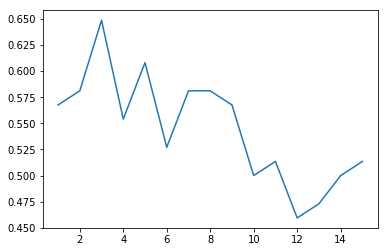

In [59]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores)  

#### Random Forest Classifier

In [60]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6423129414668496
Accuracy Score:  0.6351351351351351


#### Fine tuninng Random Forest for different number of estimators

5-------0.6542185663924794
10-------0.6423129414668496
15-------0.627721118607614
20-------0.6301377433771801
30-------0.658034398034398
35-------0.6604622013317666
40-------0.6741446259093319
45-------0.6941167993259871
50-------0.7055270806886211
100-------0.6971420995803138
200-------0.6702316184006325
300-------0.6702316184006325


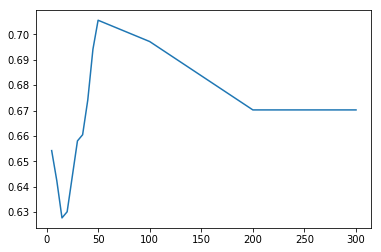

In [61]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
for i in range (0,len(estimators)):
    print(str(estimators[i]) + "-------" + str(f1_scores[i]))

#### Lets fine tune for number of features with best number of estimator from above analysis

In [62]:
rf_classifier = RandomForestClassifier(n_estimators=35, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6604622013317666
Accuracy Score:  0.6621621621621622


[0.632852546423975, 0.619666048237477, 0.6767087817754853, 0.7037379845599023, 0.6276040905770636, 0.6918388977212506, 0.6823537263013744, 0.6935942435942437, 0.620561738208797, 0.6849947349947352, 0.6830319040845357]


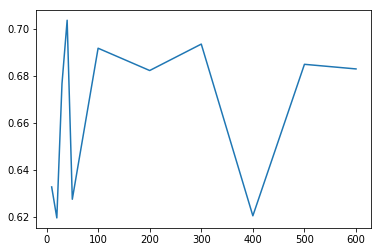

In [63]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=30,random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

#### Logistic regression model

In [64]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.4515354063741161
Accuracy Score:  0.4864864864864865


#### Extra tree classifier

In [65]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=5,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.557263226539156
Accuracy Score:  0.5540540540540541


[0.557263226539156, 0.5945238802381659, 0.6288452088452088, 0.6096944450320954, 0.6143912324036547, 0.6269896378592031, 0.6143912324036547, 0.5926521019688722, 0.6031632653061225, 0.6361269609658006, 0.6198112977842708, 0.6474617286810554]


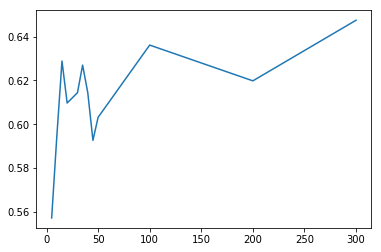

In [66]:
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [67]:
model = ExtraTreesClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6361269609658006
Accuracy Score:  0.6351351351351351


#### fine tune for max_features

[0.6467685076380729, 0.6248188748188749, 0.6744031129548723, 0.6027213972866147, 0.5732588139633149, 0.6494612425225886, 0.6826769301855669, 0.632852546423975, 0.6635689535689536, 0.659895920765486, 0.6438150965177993]


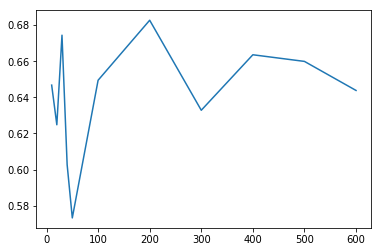

In [68]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=20,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

#### Recursive Feature Elimination 

In [69]:
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 1559
Best features : Index(['Rural__symmetry_looking__r_0.6000000000000001',
       'Rural__symmetry_looking__r_0.65',
       'Rural__symmetry_looking__r_0.7000000000000001',
       'Rural__symmetry_looking__r_0.75', 'Rural__symmetry_looking__r_0.8',
       'Rural__symmetry_looking__r_0.8500000000000001',
       'Rural__symmetry_looking__r_0.9',
       'Rural__symmetry_looking__r_0.9500000000000001',
       'Rural__time_reversal_asymmetry_statistic__lag_1',
       'Rural__time_reversal_asymmetry_statistic__lag_2',
       ...
       'Urban__symmetry_looking__r_0.8500000000000001',
       'Urban__symmetry_looking__r_0.9',
       'Urban__symmetry_looking__r_0.9500000000000001',
       'Urban__time_reversal_asymmetry_statistic__lag_1',
       'Urban__time_reversal_asymmetry_statistic__lag_2',
       'Urban__time_reversal_asymmetry_statistic__lag_3',
       'Urban__value_count__value_-inf', 'Urban__value_count__value_0',
       'Urban__value_count__value_1', 'Ur

In [70]:
cols = X_train.columns[rfecv.support_]

In [71]:
X = X[cols]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [73]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

         -1       0.71      0.66      0.68        38
          0       0.15      0.43      0.22         7
          1       0.47      0.31      0.38        29

avg / total       0.57      0.50      0.52        74

Accuracy is:  0.5


[0.47692307692307695, 0.46153846153846156, 0.5076923076923077, 0.47692307692307695, 0.46153846153846156, 0.47692307692307695, 0.47692307692307695, 0.46153846153846156, 0.4307692307692308, 0.4153846153846154, 0.4, 0.4, 0.4153846153846154, 0.4307692307692308, 0.4]


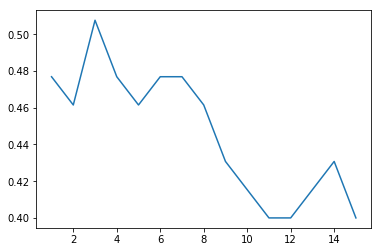

In [44]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores) 

[0.4658292365529207, 0.49758241758241756, 0.4523378582202111, 0.35350911383698275, 0.37172170625351075, 0.4215384615384616, 0.4347199902974439, 0.45086463923673226, 0.4627539269141663, 0.5011965811965812, 0.4835052685957405, 0.47585497192232284]


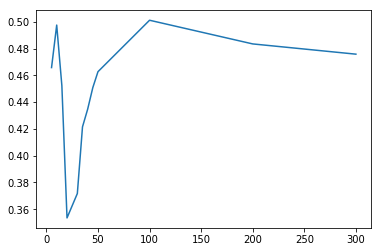

In [45]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [46]:
rf_classifier = RandomForestClassifier(n_estimators=30, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

         -1       0.50      0.24      0.33        29
          0       0.45      0.33      0.38        15
          1       0.33      0.62      0.43        21

avg / total       0.43      0.38      0.37        65

Accuracy is:  0.38461538461538464
